In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# Check the size
df.shape

(299, 13)

In [7]:
# Check the dataset is imbalanced or not
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
from sklearn.utils import resample

In [9]:
# As we have small data set so we will go for upsampling

In [10]:
minority_class=df[df['DEATH_EVENT']==1]
majority_class=df[df['DEATH_EVENT']==0]

In [11]:
minority_class_upsample=resample(minority_class,n_samples=len(majority_class),replace=True)

In [12]:
minority_class_upsample.shape

(203, 13)

In [13]:
minority_class_upsample.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1
67,72.0,1,110,0,25,0,274000.0,1.0,140,1,1,65,1
36,90.0,1,60,1,50,0,226000.0,1.0,134,1,0,30,1
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
32,50.0,1,249,1,35,1,319000.0,1.0,128,0,0,28,1


In [14]:
df_upsampled=pd.concat([majority_class,minority_class_upsample])

In [15]:
df_upsampled.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0


In [16]:
df_upsampled.shape

(406, 13)

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
type(df_upsampled)

pandas.core.frame.DataFrame

In [19]:
# Now we have the upsample data frame is df_upsampled

In [20]:
# Check the null values

In [21]:
df_upsampled.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [22]:
# Check the duplicate values

In [23]:
df_upsampled.duplicated().sum()

118

In [24]:
df_upsampled.shape

(406, 13)

# EDA 

### Based on the sampling we might get the incorrect info, so we go with correct dataframe instead of upsampling

#### Check the relation of all the numerical coulmns

In [25]:
df_upsampled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,61.826766,0.463054,641.135468,0.384236,36.849754,0.391626,260748.407192,1.598768,136.098522,0.645320,0.310345,117.800493,0.500000
std,11.861400,0.499248,1192.226677,0.487014,12.332616,0.488716,96415.737715,1.408657,4.753701,0.479006,0.463206,79.379116,0.500617
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,53.000000,0.000000,122.250000,0.000000,25.000000,0.000000,210000.000000,1.000000,134.000000,0.000000,0.000000,43.250000,0.000000
50%,60.000000,0.000000,275.000000,0.000000,35.000000,0.000000,263358.030000,1.180000,136.000000,1.000000,0.000000,107.000000,0.500000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,304000.000000,1.700000,139.000000,1.000000,1.000000,192.750000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [26]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


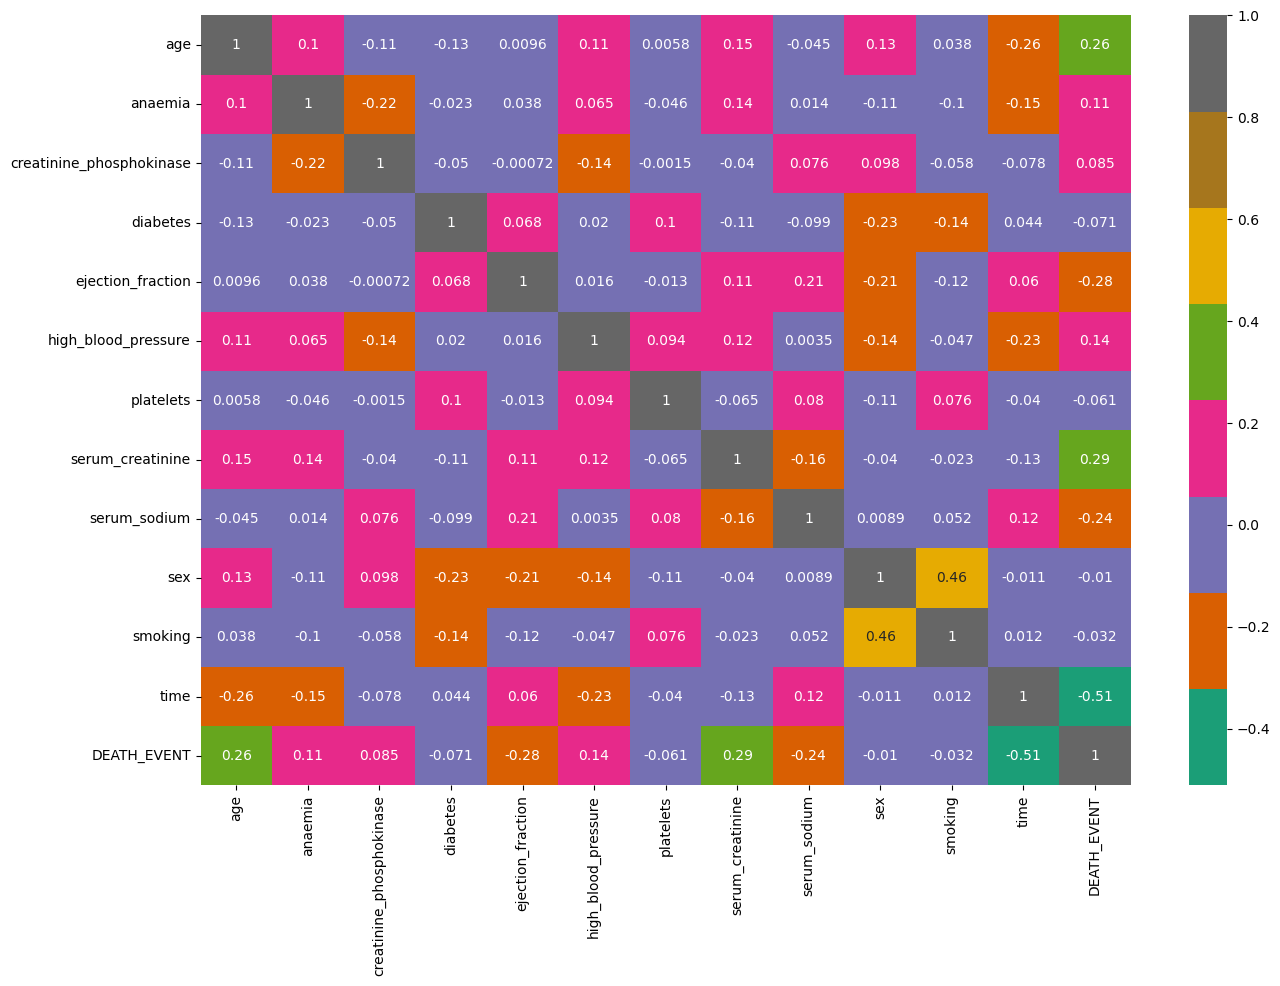

In [28]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_upsampled.corr(),annot=True,cmap='Dark2')
plt.show()

#### As per above we can say that the sex and smoking are correlated with each other

# Count the Death Event based sex

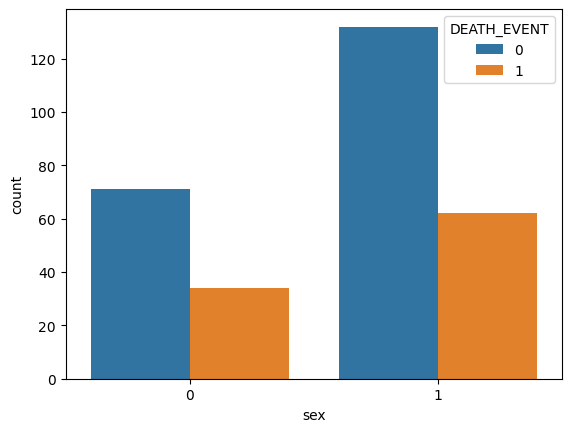

In [39]:
sns.countplot(x=df['sex'],hue=df['DEATH_EVENT'],data=df,)
plt.show()

#### As per above we can say that the sex cat 0 are the getting highest Heart Failure

In [30]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# count death event based on the smoking status

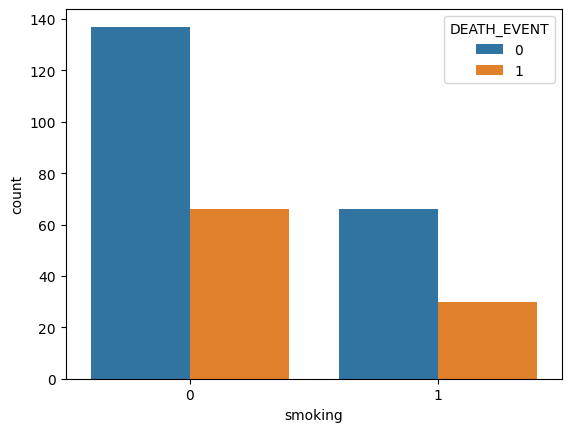

In [40]:
sns.countplot(x=df["smoking"],hue=df["DEATH_EVENT"],data=df)
plt.show()

In [42]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

##### make age group and do the analysis

In [45]:
bins_age=[40,50,60,70,80,90,100]
df['age_group']=pd.cut(df['age'],bins=bins_age)

In [48]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(70, 80]"
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(50, 60]"
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"(60, 70]"
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,"(40, 50]"
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,"(60, 70]"


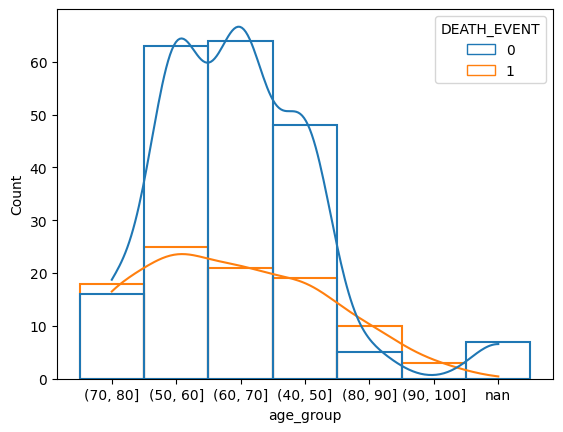

In [60]:
sns.histplot(x=df['age_group'].astype(str),hue='DEATH_EVENT',data=df,kde=True,fill=False)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

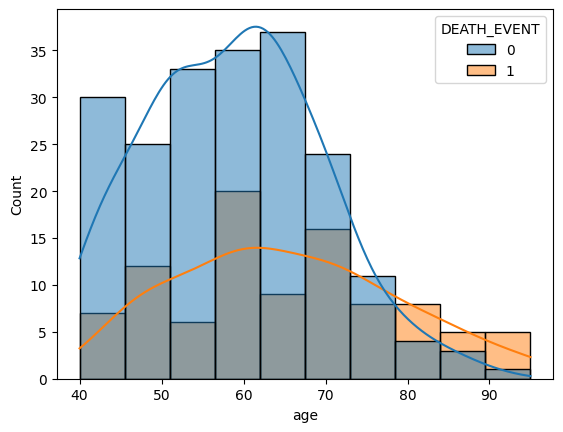

In [61]:
sns.histplot(x=df['age'],hue=df['DEATH_EVENT'],data=df,kde=True)

##### As per above we can say the heartfailure is high at age of 40-70

### Check the death event As per high_blood_pressure  

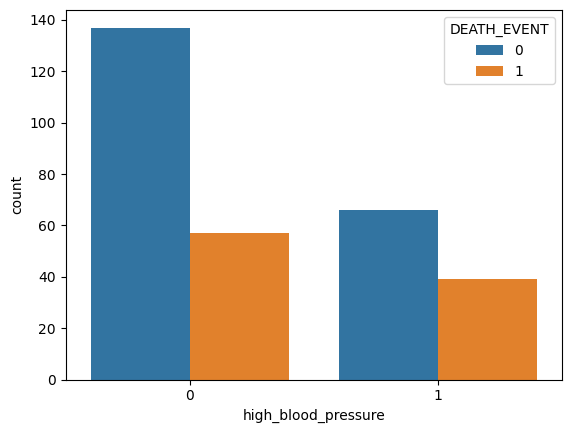

In [66]:
sns.countplot(x=df['high_blood_pressure'],data=df,hue=df["DEATH_EVENT"])
plt.show()

In [65]:
df['high_blood_pressure'].unique()

array([1, 0], dtype=int64)

#### As per above we can say that the the person have the high BP have the high chances of heart attack

In [67]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
age_group                     6
dtype: int64

In [68]:
df.dtypes

age                          float64
anaemia                        int64
creatinine_phosphokinase       int64
diabetes                       int64
ejection_fraction              int64
high_blood_pressure            int64
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                            int64
smoking                        int64
time                           int64
DEATH_EVENT                    int64
age_group                   category
dtype: object

In [70]:
int_cols=[]
for i in df.columns:
    if df[i].dtypes=='int64':
        int_cols.append(i)

In [71]:
int_cols

['anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

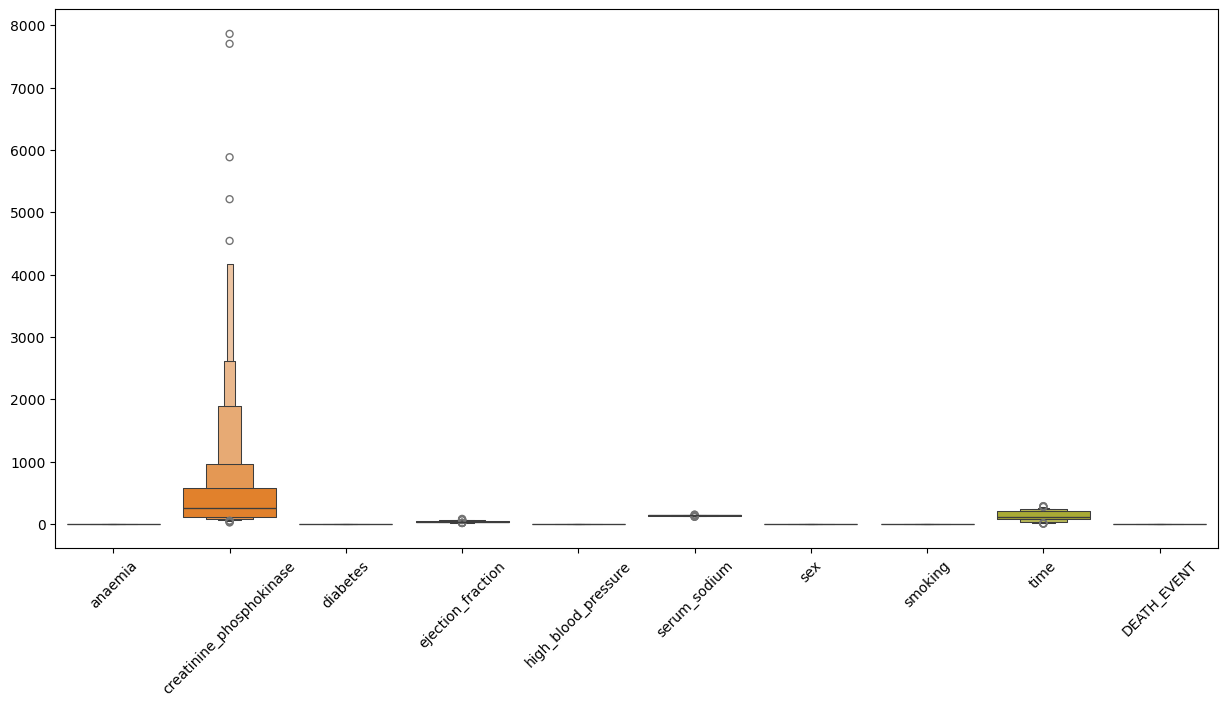

In [77]:
plt.subplots(figsize=(15,7))
sns.boxenplot(df[int_cols])
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

### Here we will go through the upsampled data set and decide the model then we will make pipeline for that

In [78]:
df_upsampled.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    201
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   172
serum_creatinine             38
serum_sodium                 27
sex                           2
smoking                       2
time                        142
DEATH_EVENT                   2
dtype: int64

In [79]:
df_upsampled_copy=df_upsampled.copy()

In [80]:
type(df_upsampled_copy)

pandas.core.frame.DataFrame

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [88]:
df_upsampled[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]=scaler.fit_transform(df_upsampled[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']])

In [89]:
df_upsampled.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,-1.082721,1,-0.471242,0,-0.556103,1,1.726448,-0.425588,0.400493,0,0,-1.334495,0
20,0.267856,1,-0.494757,0,-0.962032,1,0.158381,-0.212356,0.189871,0,0,-1.284042,0


# Split the dataset

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
X=df_upsampled.drop(columns=['DEATH_EVENT'])

In [95]:
X.shape

(406, 12)

In [96]:
df_upsampled.shape

(406, 13)

In [97]:
y=df_upsampled['DEATH_EVENT']

In [98]:
y.shape

(406,)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Build the model and train the model

In [99]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr=LogisticRegression(penalty= 'l1', solver= 'liblinear')

In [101]:
lr_param={
    "penalty":['l1', 'l2', 'elasticnet'],
    "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [102]:
from sklearn.model_selection import GridSearchCV

In [104]:
gdr=GridSearchCV(lr,param_grid=lr_param,cv=5)

In [106]:
gdr.fit(X_train,y_train)

/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [107]:
gdr.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [109]:
lr.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [110]:
lr.score(X_train,y_train)

0.8223684210526315

In [111]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,classification_report

In [112]:
accuracy_score(lr.predict(X_test),y_test)

0.7549019607843137

In [113]:
precision_score(lr.predict(X_test),y_test)

0.7741935483870968

In [115]:
print(classification_report(lr.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70        43
           1       0.77      0.81      0.79        59

    accuracy                           0.75       102
   macro avg       0.75      0.74      0.75       102
weighted avg       0.75      0.75      0.75       102



<AxesSubplot:>

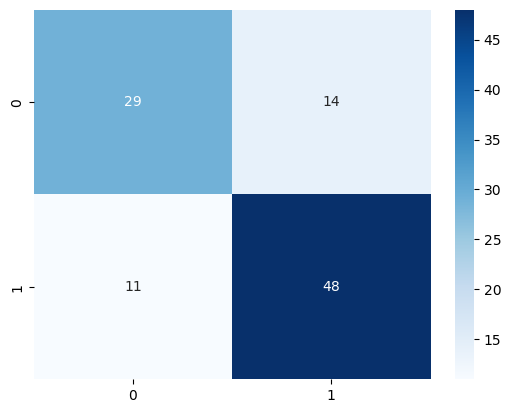

In [118]:
sns.heatmap(confusion_matrix(lr.predict(X_test),y_test),annot=True,fmt='d',cmap='Blues')

In [119]:
result=pd.DataFrame(columns=['Model','acc','precision'])

In [120]:
result

,Model,acc,precision


In [121]:
result=result.append({'Model':'LogisticRegression','acc':0.7549019607843137*100,'precision':0.7741935483870968*100},ignore_index=True)

<ipython-input-121-03276f68b774>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'LogisticRegression','acc':0.7549019607843137*100,'precision':0.7741935483870968*100},ignore_index=True)


In [122]:
result

,Model,acc,precision
0,LogisticRegression,75.490196,77.419355


# XGBclassifier

In [123]:
import xgboost as xgb

In [124]:
xgb=xgb.XGBRFClassifier()

In [125]:
xgb.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [126]:
xgb.score(X_train,y_train)

0.9835526315789473

In [127]:
accuracy_score(xgb.predict(X_test),y_test)

0.8627450980392157

In [128]:
precision_score(xgb.predict(X_test),y_test)

0.8870967741935484

In [129]:
result=result.append({'Model':'XGBClassifier','acc':0.8627450980392157*100,'precision':0.8870967741935484*100},ignore_index=True)

<ipython-input-129-6f69b600f892>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'XGBClassifier','acc':0.8627450980392157*100,'precision':0.8870967741935484*100},ignore_index=True)


In [130]:
result

,Model,acc,precision
0,LogisticRegression,75.490196,77.419355
1,XGBClassifier,86.274510,88.709677


# RandomForestClassifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rfc=RandomForestClassifier(criterion= 'log_loss', n_estimators= 190)

In [133]:
rfc_prem={
    "n_estimators":[100,130,150,170,190,210,250],
    "criterion":['gini', 'entropy', 'log_loss'],
    
}

In [134]:
rfc_gdr=GridSearchCV(rfc,param_grid=rfc_prem,cv=5)

In [135]:
rfc_gdr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 130, 150, 170, 190, 210, 250]})

In [136]:
rfc_gdr.best_params_

{'criterion': 'log_loss', 'n_estimators': 190}

In [140]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=190)

In [141]:
rfc.score(X_train,y_train)

1.0

In [142]:
accuracy_score(rfc.predict(X_test),y_test)

0.8921568627450981

In [143]:
precision_score(rfc.predict(X_test),y_test)

0.9193548387096774

In [145]:
result=result.append({'Model':'rfc','acc':0.8921568627450981*100,'precision':0.9193548387096774*100},ignore_index=True)

<ipython-input-145-385ed5889605>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'rfc','acc':0.8921568627450981*100,'precision':0.9193548387096774*100},ignore_index=True)


In [146]:
result

,Model,acc,precision
0,LogisticRegression,75.490196,77.419355
1,XGBClassifier,86.274510,88.709677
2,rfc,89.215686,91.935484


### from above we can say that the Randomforestclassifier is good for this model

# Make the pipeline

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [148]:
col_pip=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("Imputer",SimpleImputer(strategy='median'))
])

In [149]:
col_pip

Pipeline(steps=[('scaler', StandardScaler()),
                ('Imputer', SimpleImputer(strategy='median'))])

In [150]:
from sklearn.pipeline import make_pipeline

In [151]:
mp=make_pipeline(col_pip,rfc)

In [152]:
mp

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('Imputer',
                                  SimpleImputer(strategy='median'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss',
                                        n_estimators=190))])

### Train Test for pipeline

In [153]:
df_upsampled_copy.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0


In [154]:
Xp=df_upsampled_copy.drop(columns=['DEATH_EVENT'])
yp=df_upsampled_copy['DEATH_EVENT']

In [155]:
Xp_train,Xp_test,yp_train,yp_test=train_test_split(Xp,yp,test_size=0.25)

# Train the pipeline

In [156]:
mp.fit(Xp_train,yp_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('Imputer',
                                  SimpleImputer(strategy='median'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss',
                                        n_estimators=190))])

In [157]:
mp.score(Xp_train,yp_train)

1.0

In [158]:
accuracy_score(mp.predict(Xp_test),yp_test)

0.9411764705882353

In [159]:
precision_score(mp.predict(Xp_test),yp_test)

0.92

In [160]:
Xp_train.iloc[0:1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
261,62.0,1,655,0,40,0,283000.0,0.7,133,0,0,233


In [161]:
mp.predict([[62.0,1,655,0,40,0,283000,0.7,133,0,0,233]])

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [162]:
import pickle

In [163]:
pickle.dump(mp,open('pipeline.pkl','wb'))